# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np #numerical computations. large, multi-dimensional arrays and matrices
import pandas as pd #data manipulation and analysis
import matplotlib.pyplot as plt #
import seaborn as sns #data visualization library provides a high-level interface for creating statistical graphics
import random
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')

# Libraries for data preparation and model building
import numpy as np 
import pandas as pd
#import tensorflow as tf
from sklearn.linear_model import LogisticRegression #work with a classification algorithm like Logistic Regression
import statsmodels.api as sm



# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 0

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [2]:
df = pd.read_csv('/Users/ntebatserachidi/Desktop/Academia/Explore Data Science Academy/Advanvced Regression/Regression Predict/Advanced-Regression-Starter-Data/df_train.csv') #Load the train CSV file into a pandas DataFrame

## Cleaning Data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [3]:
# View the first 10 rows of the DataFrame
df.head(10)

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.000000,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.000000,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.000000,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.000000,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.000000,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667
5,5,2015-01-01 18:00:00,1.000000,level_7,0.0,1.000000,69.666667,67.333333,12.333333,0.666667,...,274.639229,284.165625,277.919000,277.919000,284.165625,277.919000,282.077844,274.639229,274.639229,6842.000000
6,6,2015-01-01 21:00:00,1.000000,level_8,0.0,1.000000,83.666667,63.333333,16.333333,1.000000,...,268.287000,283.420333,274.295437,274.295437,283.420333,274.295437,277.637000,268.287000,268.287000,10760.333333
7,7,2015-01-02 00:00:00,1.000000,level_9,0.0,1.000000,83.666667,64.000000,8.666667,1.333333,...,266.882333,282.474000,272.903167,272.903167,282.474000,272.903167,276.457333,266.882333,266.882333,10866.000000
8,8,2015-01-02 03:00:00,1.000000,level_9,0.0,1.000000,86.000000,63.333333,5.333333,1.000000,...,266.226667,281.726667,271.780115,271.780115,281.726667,271.780115,276.151667,266.226667,266.226667,-1850.333333
9,9,2015-01-02 06:00:00,1.000000,level_9,0.0,1.333333,87.000000,63.666667,15.333333,1.000000,...,266.878000,281.803000,271.673667,271.673667,281.803000,271.673667,276.453000,266.878000,266.878000,-4002.333333


In [4]:
df.shape

(8763, 49)

Observations: 8763 rows and 49 columns
There is one unnamed column to be dropped in data engineering section

In [6]:
# look at data statistics
df.describe() #mode

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [7]:
df.info() #The info command confirms our categorical and numerical features. outputs the number of non-null entries in each column.
#As such, we can be certain that our data has missing values if columns have a varying number of non-null entries.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

Valencia_pressure has 6695 entries instead of 8763, indicating that it contains missing values which can be replaced by mean or median, depending on distribution/skewness/kurtosis, in data engineering section. 

time, Valencia_wind_deg, and Seville are object types, hence, are non-numeric which may have to be changed in data engineering section. 

In [8]:
df.isnull().sum() #provide the total number of null values appearing in each feature. basically opposite of df.info

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Confirmation of the 2068 missing entries for Valencia_pressure

### Univariate Analysis: Non-Graphical

In [9]:
#descriptive statistics of each numerical feature by using the following command:
df.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,...,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,4381.000000,2.425729,0.135753,2.586272,62.658793,57.414717,43.469132,1.850356,13.714748,158.957511,...,289.540309,289.855459,285.017973,286.422929,288.447422,287.966027,291.633356,288.419439,287.202203,10673.857612
std,2529.804538,1.850371,0.374901,2.411190,22.621226,24.335396,32.551044,1.695888,24.272482,102.056299,...,9.752047,6.528111,6.705672,6.818682,6.102593,7.105590,8.178220,9.346796,9.206237,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,...,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2190.500000,1.000000,0.000000,1.000000,44.333333,36.333333,10.000000,0.666667,0.000000,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
50%,4381.000000,2.000000,0.000000,1.666667,65.666667,58.000000,45.000000,1.000000,0.000000,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
75%,6571.500000,3.333333,0.100000,3.666667,82.000000,78.666667,75.000000,2.666667,20.000000,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667
max,8762.000000,13.000000,3.000000,52.000000,100.000000,100.000000,100.000000,12.666667,97.333333,359.333333,...,314.483333,307.316667,309.816667,310.710000,304.816667,317.966667,314.816667,313.133333,310.383333,31904.000000


In [10]:
df.mean()

Unnamed: 0               4381.000000
Madrid_wind_speed           2.425729
Bilbao_rain_1h              0.135753
Valencia_wind_speed         2.586272
Seville_humidity           62.658793
Madrid_humidity            57.414717
Bilbao_clouds_all          43.469132
Bilbao_wind_speed           1.850356
Seville_clouds_all         13.714748
Bilbao_wind_deg           158.957511
Barcelona_wind_speed        2.870497
Barcelona_wind_deg        190.544848
Madrid_clouds_all          19.473392
Seville_wind_speed          2.425045
Barcelona_rain_1h           0.128906
Seville_rain_1h             0.039439
Bilbao_snow_3h              0.031912
Barcelona_pressure       1377.964605
Seville_rain_3h             0.000243
Madrid_rain_1h              0.037818
Barcelona_rain_3h           0.000439
Valencia_snow_3h            0.000205
Madrid_weather_id         773.527594
Barcelona_weather_id      765.979687
Bilbao_pressure          1017.739549
Seville_weather_id        774.658818
Valencia_pressure        1012.051407
S

In [11]:
df.Valencia_pressure.describe()

count    6695.000000
mean     1012.051407
std         9.506214
min       972.666667
25%      1010.333333
50%      1015.000000
75%      1018.000000
max      1021.666667
Name: Valencia_pressure, dtype: float64

will replace Valencia_pressure null values with mean or 50% value

In [12]:
df.std()

Unnamed: 0               2529.804538
Madrid_wind_speed           1.850371
Bilbao_rain_1h              0.374901
Valencia_wind_speed         2.411190
Seville_humidity           22.621226
Madrid_humidity            24.335396
Bilbao_clouds_all          32.551044
Bilbao_wind_speed           1.695888
Seville_clouds_all         24.272482
Bilbao_wind_deg           102.056299
Barcelona_wind_speed        1.792197
Barcelona_wind_deg         89.077337
Madrid_clouds_all          28.053660
Seville_wind_speed          1.672895
Barcelona_rain_1h           0.634730
Seville_rain_1h             0.175857
Bilbao_snow_3h              0.557264
Barcelona_pressure      14073.140990
Seville_rain_3h             0.003660
Madrid_rain_1h              0.152639
Barcelona_rain_3h           0.003994
Valencia_snow_3h            0.011866
Madrid_weather_id          77.313315
Barcelona_weather_id       88.142235
Bilbao_pressure            10.046124
Seville_weather_id         71.940009
Valencia_pressure           9.506214
S

In [13]:
df.min()

Unnamed: 0                                0
time                    2015-01-01 03:00:00
Madrid_wind_speed                       0.0
Valencia_wind_deg                   level_1
Bilbao_rain_1h                          0.0
Valencia_wind_speed                     0.0
Seville_humidity                   8.333333
Madrid_humidity                    6.333333
Bilbao_clouds_all                       0.0
Bilbao_wind_speed                       0.0
Seville_clouds_all                      0.0
Bilbao_wind_deg                         0.0
Barcelona_wind_speed                    0.0
Barcelona_wind_deg                      0.0
Madrid_clouds_all                       0.0
Seville_wind_speed                      0.0
Barcelona_rain_1h                       0.0
Seville_pressure                        sp1
Seville_rain_1h                         0.0
Bilbao_snow_3h                          0.0
Barcelona_pressure               670.666667
Seville_rain_3h                         0.0
Madrid_rain_1h                  

In [14]:
df.quantile([0.25, 0.5, 0.75], axis = 0)

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0.25,2190.5,1.000000,0.0,1.000000,44.333333,36.333333,10.0,0.666667,0.0,73.333333,...,282.150000,284.973443,280.085167,281.374167,284.150000,282.836776,285.816667,281.404281,280.299167,7390.333333
0.50,4381.0,2.000000,0.0,1.666667,65.666667,58.000000,45.0,1.000000,0.0,147.000000,...,288.116177,289.416667,284.816667,286.158333,288.150000,287.630000,290.816667,287.053333,286.083333,11114.666667
0.75,6571.5,3.333333,0.1,3.666667,82.000000,78.666667,75.0,2.666667,20.0,234.000000,...,296.816667,294.909000,289.816667,291.034167,292.966667,292.483333,297.150000,295.154667,293.884500,14498.166667


In [15]:
df.median()

Unnamed: 0               4381.000000
Madrid_wind_speed           2.000000
Bilbao_rain_1h              0.000000
Valencia_wind_speed         1.666667
Seville_humidity           65.666667
Madrid_humidity            58.000000
Bilbao_clouds_all          45.000000
Bilbao_wind_speed           1.000000
Seville_clouds_all          0.000000
Bilbao_wind_deg           147.000000
Barcelona_wind_speed        2.666667
Barcelona_wind_deg        200.000000
Madrid_clouds_all           0.000000
Seville_wind_speed          2.000000
Barcelona_rain_1h           0.000000
Seville_rain_1h             0.000000
Bilbao_snow_3h              0.000000
Barcelona_pressure       1018.000000
Seville_rain_3h             0.000000
Madrid_rain_1h              0.000000
Barcelona_rain_3h           0.000000
Valencia_snow_3h            0.000000
Madrid_weather_id         800.000000
Barcelona_weather_id      800.333333
Bilbao_pressure          1019.000000
Seville_weather_id        800.000000
Valencia_pressure        1015.000000
S

In [16]:
df.max()

Unnamed: 0                             8762
time                    2017-12-31 21:00:00
Madrid_wind_speed                      13.0
Valencia_wind_deg                   level_9
Bilbao_rain_1h                          3.0
Valencia_wind_speed                    52.0
Seville_humidity                      100.0
Madrid_humidity                       100.0
Bilbao_clouds_all                     100.0
Bilbao_wind_speed                 12.666667
Seville_clouds_all                97.333333
Bilbao_wind_deg                  359.333333
Barcelona_wind_speed              12.666667
Barcelona_wind_deg                    360.0
Madrid_clouds_all                     100.0
Seville_wind_speed                11.666667
Barcelona_rain_1h                      12.0
Seville_pressure                        sp9
Seville_rain_1h                         3.0
Bilbao_snow_3h                         21.3
Barcelona_pressure                1001411.0
Seville_rain_3h                    0.093333
Madrid_rain_1h                  

In [17]:
df.mode()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,1.0,level_1,0.0,1.0,93.0,93.0,0.0,1.0,...,282.15,287.15,284.15,297.988,288.15,288.15,289.15,278.150,273.15,-537.333333
1,1,2015-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,283.15,NaN,NaN,NaN,NaN,NaN,NaN,292.138,NaN,1203.666667
2,2,2015-01-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4144.000000
3,3,2015-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6089.666667
4,4,2015-01-01 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6401.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,8758,2017-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8759,8759,2017-12-31 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8760,8760,2017-12-31 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8761,8761,2017-12-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Additional statistical measures that can be calculated are kurtosis and skew.
df.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

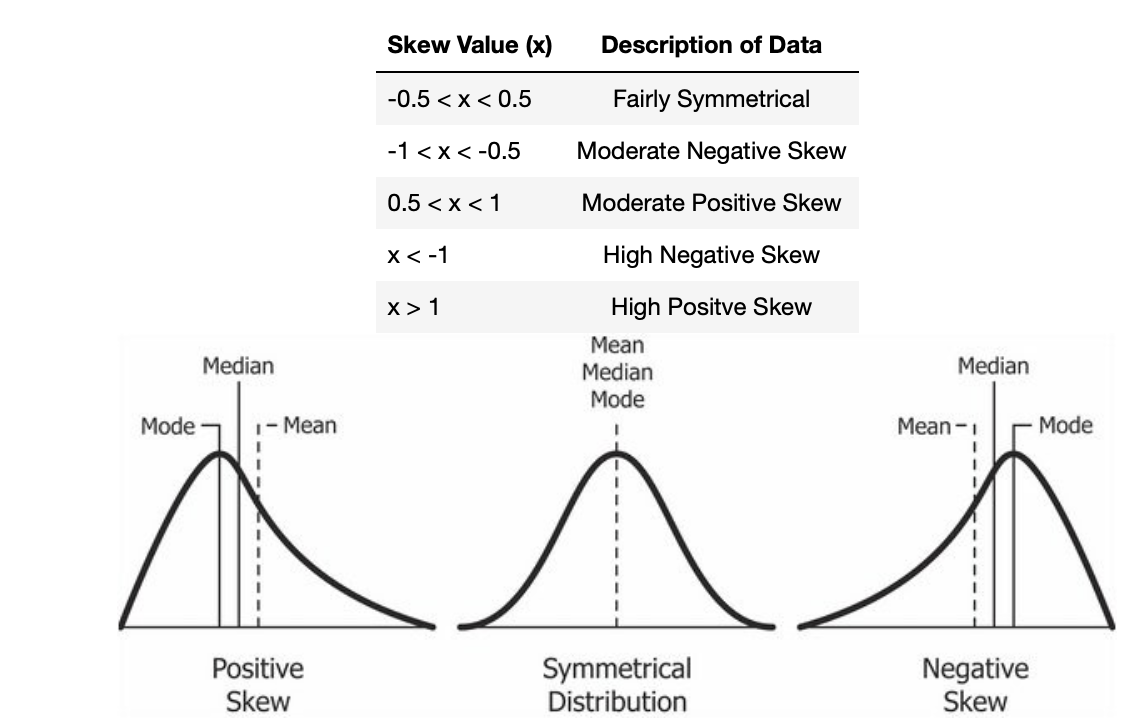

In [19]:
from IPython.display import display, Image

# Provide the image path as an argument to the Image class
display(Image(filename="Skew.png"))


Entries with high negative skew are: Valencia_pressure, Madrid_pressure, (and Bilbao_weather_id, Madrid_weather_id and Barcelona_weather_id). Those with high positive skew are: Bilbao_rain_1h, Valencia_wind_speed, Bilbao_snow_3h, Seville_rain_3h, Barcelona_pressure, Seville_rain_3h, Madrid_rain_1h, Barcelona_rain_3h, Valencia_snow_3h)

In [20]:
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

Features with high kurtosis i.e. >3, implying a large number of outliers are: Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, (Madrid_weather_id, Barcelona_weather_id, Seville_weather_id, are IDs relevant in distribution study)

Units are not provided, however, a pressure of 3687.564230 for Barcelona would not be representative of weather conditions on earth, atmospheric pressure is typically 1013 hPa. This value would potentially be dropped or replaced in data engineering. 

This is also the case for the recorded value for Valencia_snow_3h as 4089.323165 (centimetres or inches) is not a realistic recording for snowfall especially in 3h. 

Furthermore, it is highly unlikely for it to rain 413 millimeters (mm) in just 3 hours under normal weather conditions as the rate of rainfall is often expressed in terms of millimeters per hour (mm/hr). A very heavy rainfall rate might be in the range of 50 to 100 mm/hr during an intense thunderstorm or a severe rainfall event. 

Entries with high skewness often correspond with values with high kurtosis indicating non-normally distributed. These entries would either be replaced or dropped in data emgineering section. 

In [41]:
# plot relevant feature interactions

<IPython.core.display.Javascript object>


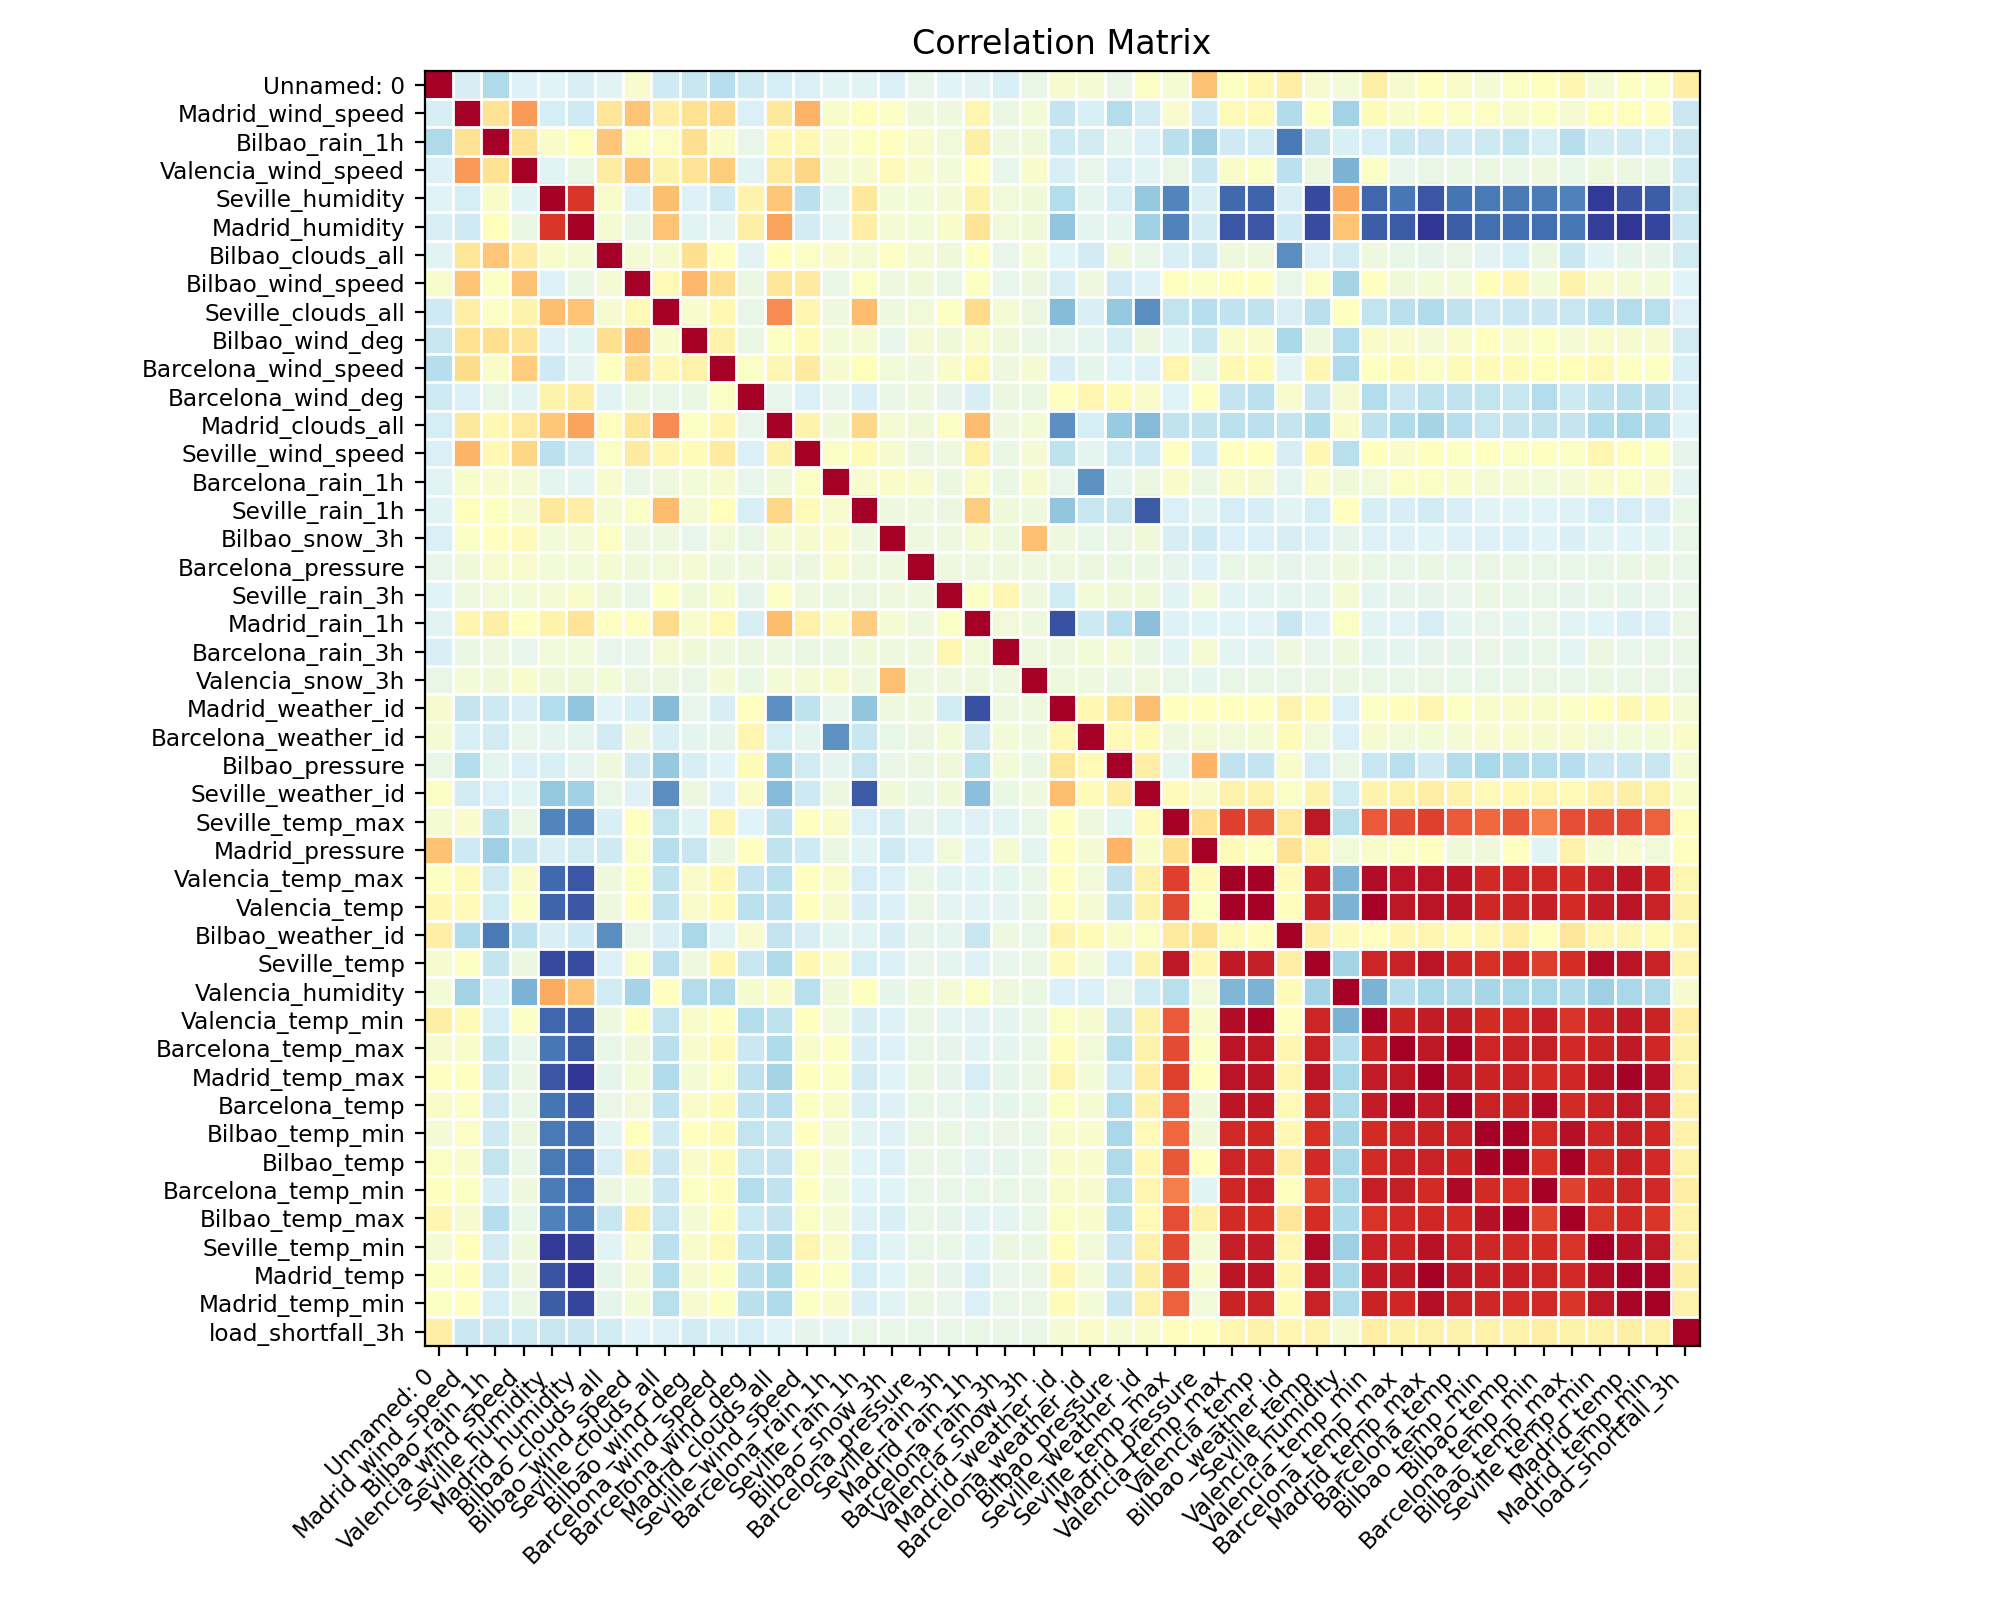

In [43]:
#evaluate correlation
from statsmodels.graphics.correlation import plot_corr
import matplotlib.pyplot as plt
corr = df.drop('Valencia_pressure', axis='columns').corr()
fig, ax = plt.subplots(figsize=(10, 8))  
plot_corr(corr, xnames=corr.columns, ax=ax)
plt.show()


Strongest correlations, and therefore, most influential features on energy production are min/max temperature of the cities. Wind speed, wind degrees, pressure, rain, snow and cloud cover have less influence (bottom right correlations in matrix)

In [ ]:
# have a look at feature distributions

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [21]:
#Cleaning your data will consist of checking for null, empty, missing and duplicated values.
df.isnull().sum() #provide the total number of null values appearing in each feature. basically opposite of df.info

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

Mean: You should consider using the mean (average) to replace null values when your data is approximately normally distributed. This means that the data is symmetric and bell-shaped. The mean can be sensitive to extreme outliers, so if your data has significant outliers, it might not be the best choice.

Median: The median is a robust statistic that is less affected by extreme values or outliers. You should consider using the median to replace null values when your data is skewed or has outliers. If your data has a non-normal distribution, the median can be a more representative measure of central tendency.

In [26]:
your_data_list = df['Valencia_pressure'].tolist()


In [30]:
#Replace null values with median because Valencia_pressure is negatively skewed (-1.7)
column_name = 'Valencia_pressure'  

# Calculate the mean value
mean_value = 1015

# Replace null values in the specified column with the mean
df[column_name].fillna(mean_value, inplace=True)

In [31]:
# Replace null values in a specific column with a mean value because kurtosis is 2.21 so no outliers ?
column_name = 'Valencia_pressure'  

# Calculate the mean value
mean_value = 1012.051407

# Replace null values in the specified column with the mean
df[column_name].fillna(mean_value, inplace=True)

In [32]:
df = df.drop_duplicates() #Remove Duplicates

In [44]:
# Find the "unnamed" column by checking its name
unnamed_columns = [col for col in df.columns if 'unnamed' in col.lower()]

# Drop the "unnamed" column(s)
df.drop(columns=unnamed_columns, inplace=True)

# If you want to save the modified DataFrame back to a file
# df.to_csv('modified_data.csv', index=False)  # Replace 'modified_data.csv' with the desired file name


In [ ]:
# create new features
#Temperate range
df['temp_range'] = df['Madrid_temp_max'] - df['Madrid_temp_min']
df['temp_range'] = df['Valencia_temp_max'] - df['Valencia_temp_min']
df['temp_range'] = df['Seville_temp_max'] - df['Seville_temp_min']
df['temp_range'] = df['Bilbao_temp_max'] - df['Bilbao_temp_min']
df['temp_range'] = df['Barcelona_temp_max'] - df['Barcelona_temp_min']
print(df[['Madrid_temp_range', 'Valencia_temp_range', 'Seville_temp_range', 'Bilbao_temp_range', 'Barcelona_temp_range']].head())

#Cloud cover
#Solar Intensity: The intensity of sunlight is a key factor. 
#On a bright, sunny day, with high solar intensity, solar panels will heat up more quickly than on a 
#cloudy or overcast day with lower solar intensity

In [ ]:
# engineer existing features

In [ ]:
# have a look at feature distributions


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [ ]:
# split data

In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models

In [ ]:
# evaluate one or more ML models
#model accuracy: variable selection notebook

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic